### `Problem Statement`

* Have you ever wondered when the best time of year to book a hotel room is? Or the optimal length of stay in order to get the best daily rate? What if you wanted to predict whether or not a hotel was likely to receive a disproportionately high number of special requests? This hotel booking dataset can help you explore those questions! This data set contains booking information for a city hotel and a resort hotel, and includes information such as when the booking was made, length of stay, the number of adults, children, and/or babies, and the number of available parking spaces, among other things. All personally identifying information has been removed from the data. Explore and analyze the data to discover important factors that govern the bookings.

### `Define Your Business Objective?`

* Analyse the data on bookings of City Hotel and Resort Hotel to gain insights on the different factors that affect the booking. This is undertaken as an individual project.

In [5]:
import numpy as np 
import pandas as pd
pd.set_option('display.max_columns', None)
import seaborn as sns
import matplotlib.pyplot as plt

In [6]:
df = pd.read_csv("Hotel_Bookings[1].csv")
df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,3,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,4,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Direct,Direct,0,0,0,A,C,0,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Corporate,Corporate,0,0,0,A,A,0,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,0.0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03


In [7]:
new_df = df.copy()

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

In [9]:
df.shape

(119390, 32)

In [10]:
df.duplicated().sum()

31994

In [11]:
df.drop_duplicates(inplace=True)

* Since these are true duplicates, we are dropping them to avoid making the data complex and to ensure accurate model predictions.

* We're dropping almost 31,994 rows because they're not providing any information.

### `Check Unique Values for each variable.`

In [14]:
# Check Unique Values for each variable.
# Checking the number of Unique Values for each variable

for elem in df.columns:
  print('Number of unique values in',elem,'column is',df[elem].nunique())

# Using for-loop for each variable of Dataset

Number of unique values in hotel column is 2
Number of unique values in is_canceled column is 2
Number of unique values in lead_time column is 479
Number of unique values in arrival_date_year column is 3
Number of unique values in arrival_date_month column is 12
Number of unique values in arrival_date_week_number column is 53
Number of unique values in arrival_date_day_of_month column is 31
Number of unique values in stays_in_weekend_nights column is 17
Number of unique values in stays_in_week_nights column is 35
Number of unique values in adults column is 14
Number of unique values in children column is 5
Number of unique values in babies column is 5
Number of unique values in meal column is 5
Number of unique values in country column is 177
Number of unique values in market_segment column is 8
Number of unique values in distribution_channel column is 5
Number of unique values in is_repeated_guest column is 2
Number of unique values in previous_cancellations column is 15
Number of uni

In [15]:
df.describe()

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,agent,company,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests
count,87396.000000,87396.000000,87396.000000,87396.000000,87396.000000,87396.000000,87396.000000,87396.000000,87392.000000,87396.000000,87396.000000,87396.000000,87396.000000,87396.000000,75203.000000,5259.000000,87396.000000,87396.000000,87396.000000,87396.000000
mean,0.274898,79.891368,2016.210296,26.838334,15.815541,1.005263,2.625395,1.875795,0.138640,0.010824,0.039075,0.030413,0.183990,0.271603,94.138306,183.081384,0.749565,106.337246,0.084226,0.698567
std,0.446466,86.052325,0.686102,13.674572,8.835146,1.031921,2.053584,0.626500,0.455881,0.113597,0.193775,0.369145,1.731894,0.727245,113.188172,130.557608,10.015731,55.013953,0.281533,0.831946
min,0.000000,0.000000,2015.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,6.000000,0.000000,-6.380000,0.000000,0.000000
25%,0.000000,11.000000,2016.000000,16.000000,8.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9.000000,47.000000,0.000000,72.000000,0.000000,0.000000
50%,0.000000,49.000000,2016.000000,27.000000,16.000000,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,14.000000,169.000000,0.000000,98.100000,0.000000,0.000000
75%,1.000000,125.000000,2017.000000,37.000000,23.000000,2.000000,4.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,240.000000,263.000000,0.000000,134.000000,0.000000,1.000000
max,1.000000,737.000000,2017.000000,53.000000,31.000000,19.000000,50.000000,55.000000,10.000000,10.000000,1.000000,26.000000,72.000000,21.000000,535.000000,543.000000,391.000000,5400.000000,8.000000,5.000000


### `Variables Description`

1. **hotel :** Name of the hotel (Resort Hotel or City Hotel)

2. **is_canceled :** If the booking was canceled (1) or not (0)

3. **lead_time:** Number of days before the actual arrival of the guests

4. **arrival_date_year :** Year of arrival date

5. **arrival_date_month :** Month of arrival date

6. **arrival_date_week_number :** Week number of year for arrival date

7. **arrival_date_day_of_month :** Day of arrival date

8. **stays_in_weekend_nights :** Number of weekend nights (Saturday or Sunday) spent at the hotel by the guests.

9. **stays_in_week_nights :** Number of weeknights (Monday to Friday) spent at the hotel by the guests.

10. **adults :** Number of adults among guests

11. **children :** Number of children among guests

12. **babies :** Number of babies among guests

13. **meal :** Type of meal booked

14. **country :** Country of guests

15. **market_segment :** Designation of market segment

16. **distribution_channel :** Name of booking distribution channel

17. **is_repeated_guest :** If the booking was from a repeated guest (1) or not (0)

18. **previous_cancellations :** Number of previous bookings that were cancelled by the customer prior to the current booking

19. **previous_bookings_not_canceled :** Number of previous bookings not cancelled by the customer prior to the current booking

20. **reserved_room_type :** Code of room type reserved

21. **assigned_room_type :** Code of room type assigned

22. **booking_changes :** Number of changes/amendments made to the booking

23. **deposit_type :** Type of the deposit made by the guest

24. **agent :** ID of travel agent who made the booking

25. **company :** ID of the company that made the booking

26. **days_in_waiting_list :** Number of days the booking was in the waiting list

27. **customer_type :** Type of customer, assuming one of four categories

28. **adr :** Average Daily Rate, as defined by dividing the sum of all lodging transactions by the total number of staying nights

29. **required_car_parking_spaces :** Number of car parking spaces required by the customer

30. **total_of_special_requests :** Number of special requests made by the customer

31. **reservation_status :** Reservation status (Canceled, Check-Out or No-Show)

32. **reservation_status_date :** Date at which the last reservation status was updated

In [18]:
df.isnull().sum()

hotel                                 0
is_canceled                           0
lead_time                             0
arrival_date_year                     0
arrival_date_month                    0
arrival_date_week_number              0
arrival_date_day_of_month             0
stays_in_weekend_nights               0
stays_in_week_nights                  0
adults                                0
children                              4
babies                                0
meal                                  0
country                             452
market_segment                        0
distribution_channel                  0
is_repeated_guest                     0
previous_cancellations                0
previous_bookings_not_canceled        0
reserved_room_type                    0
assigned_room_type                    0
booking_changes                       0
deposit_type                          0
agent                             12193
company                           82137


In [19]:
# we are droping the company columns because there is 94% null-value so this columns is not useful.
(112593/119390)*100
df = df.drop("company",axis=1)


In [20]:
#  Since agent help us to do more business and it is giving information.
#  Dropping rows with missing Agent removes 13.7% of data, which could be valuable.
#  we will fill it with 0
(16340/119390)*100

df["agent"] = df["agent"].fillna(0)

In [21]:
# Country is having less number of null-values.it won't affect anything so drop it.
(488/119390)*100

df = df.dropna()

In [22]:
df.isnull().sum()

hotel                             0
is_canceled                       0
lead_time                         0
arrival_date_year                 0
arrival_date_month                0
arrival_date_week_number          0
arrival_date_day_of_month         0
stays_in_weekend_nights           0
stays_in_week_nights              0
adults                            0
children                          0
babies                            0
meal                              0
country                           0
market_segment                    0
distribution_channel              0
is_repeated_guest                 0
previous_cancellations            0
previous_bookings_not_canceled    0
reserved_room_type                0
assigned_room_type                0
booking_changes                   0
deposit_type                      0
agent                             0
days_in_waiting_list              0
customer_type                     0
adr                               0
required_car_parking_spaces 

In [23]:
df.columns 

Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies', 'meal',
       'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type', 'agent',
       'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status', 'reservation_status_date'],
      dtype='object')

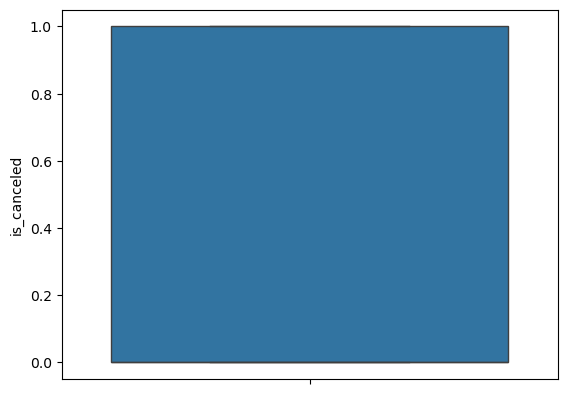

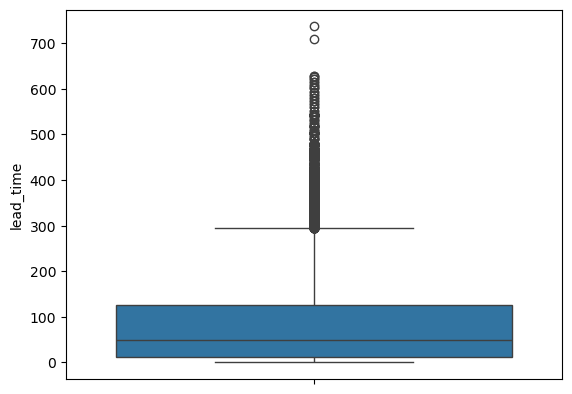

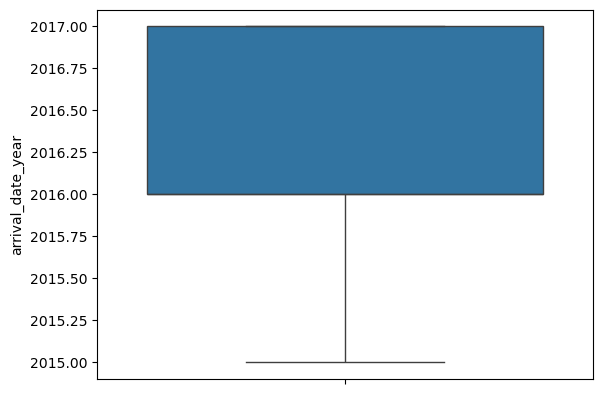

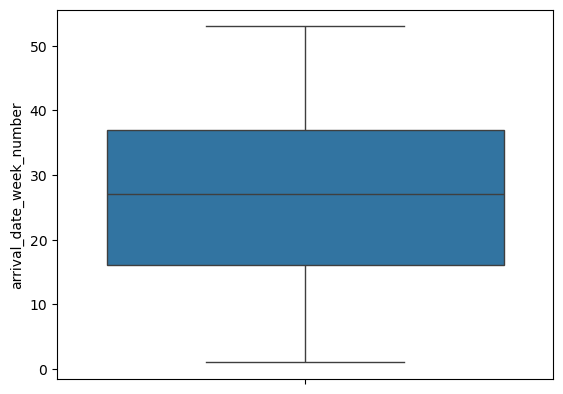

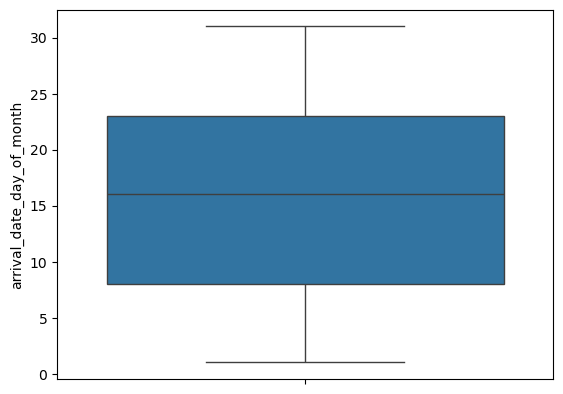

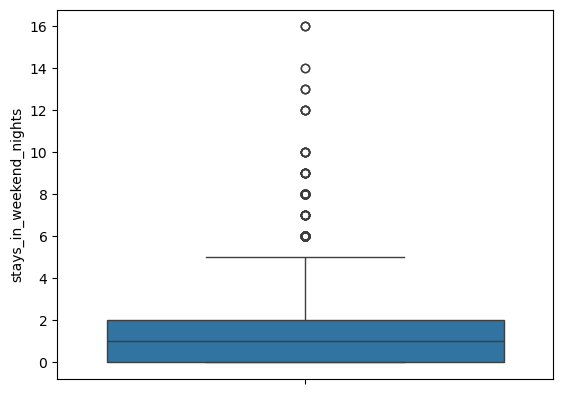

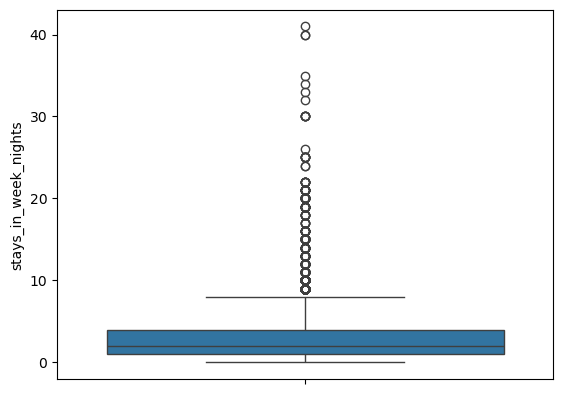

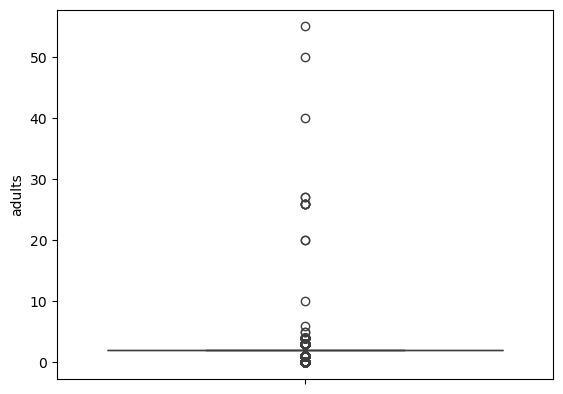

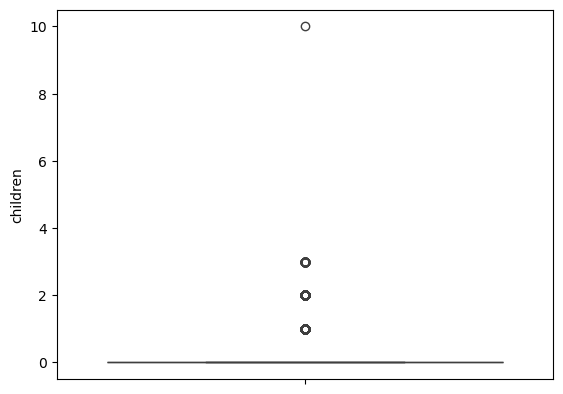

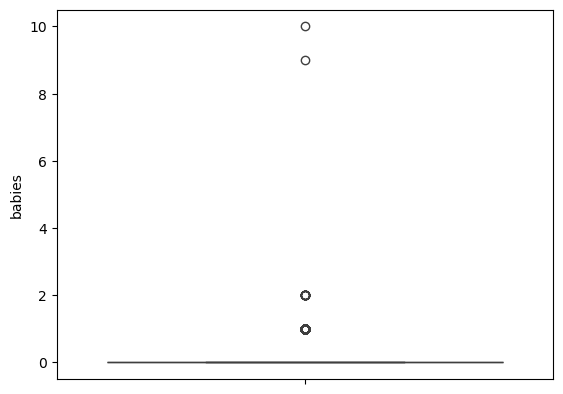

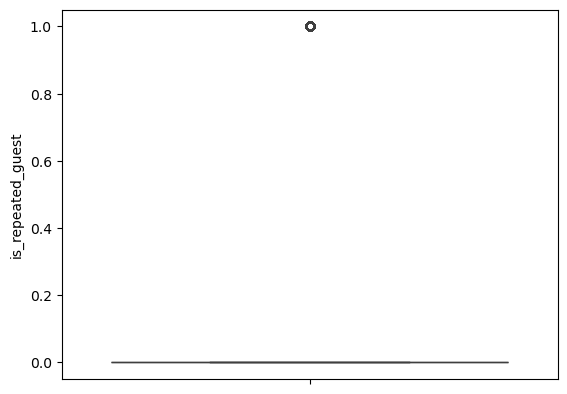

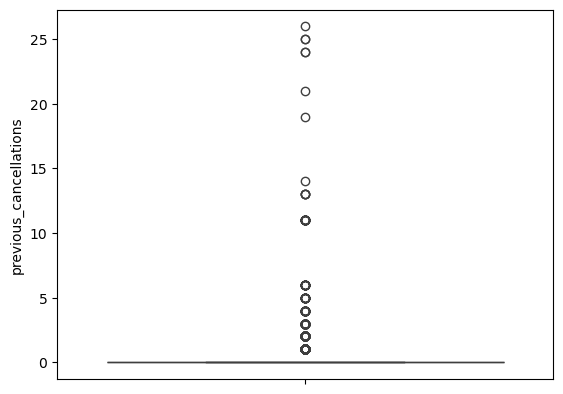

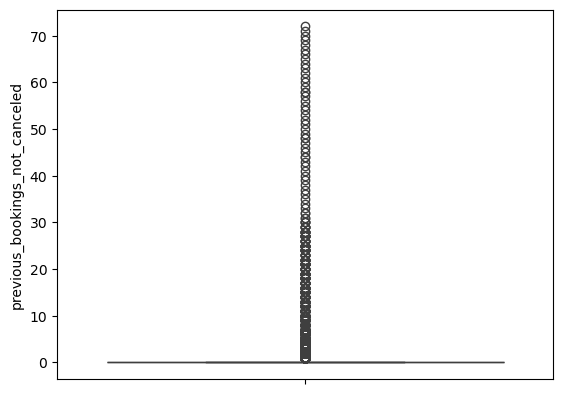

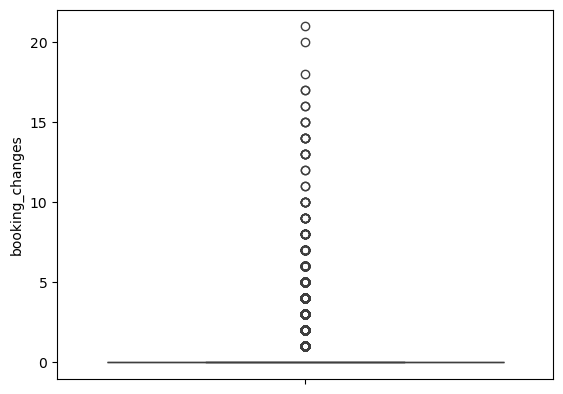

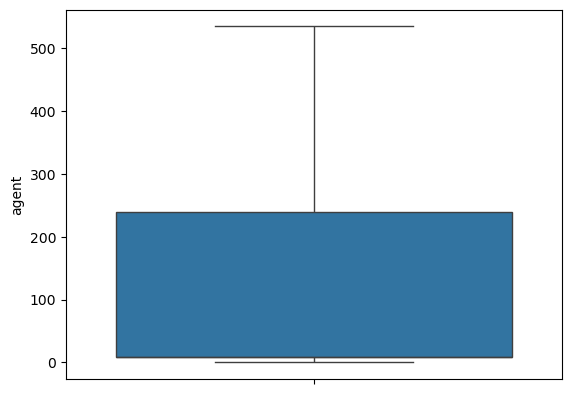

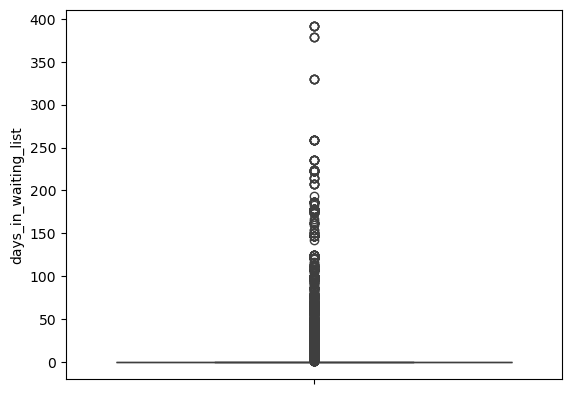

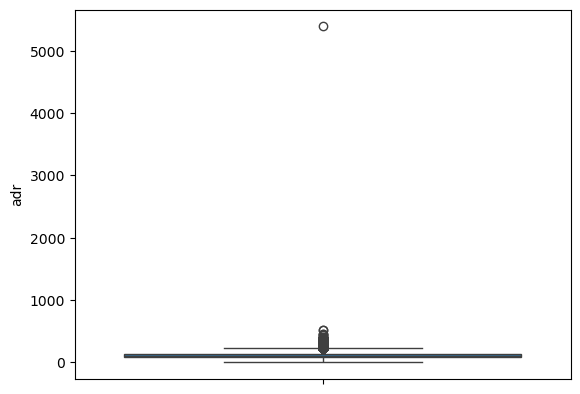

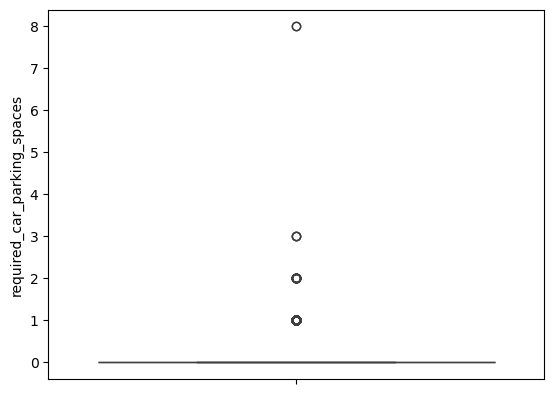

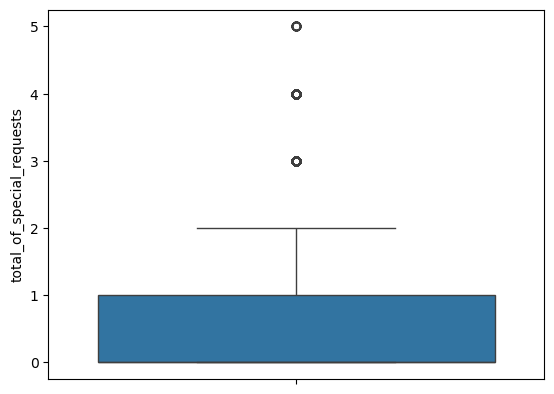

In [24]:
for i in df.columns:
    if df[i].dtype != "object":
        sns.boxplot(df[i])
        plt.show()
        

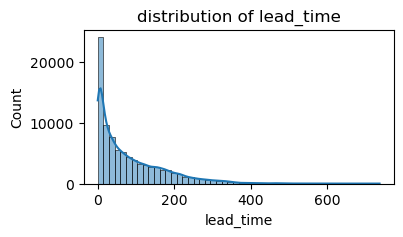

In [25]:
plt.figure(figsize=(4,2))
sns.histplot(df["lead_time"],bins=50,kde = True)
plt.title("distribution of lead_time")
plt.show()

* High Number of Last-Minute Bookings (0 Days).
* Many people book and check in on the same day maybe with Walk-in guests,Business travelers needing urgent stays,Special last-minute discounts.
* The sharp decline from 0 to 10 days suggests that fewer people book between 1-10 days in advance.
* After 10 days, the trend stabilizes, meaning most guests who plan in advance do so in a predictable manner.
* we will not remove the outliers of lead_time as it is important for our analysis.

In [27]:
df.sort_values(by="stays_in_weekend_nights",ascending=False).head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
33924,Resort Hotel,0,71,2017,January,2,10,16,40,2,0.0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,196.0,0,Transient,28.79,0,0,Check-Out,2017-03-07
101794,City Hotel,0,140,2016,September,39,22,16,41,0,0.0,0,SC,GBR,Online TA,TA/TO,0,0,0,A,K,12,No Deposit,9.0,0,Transient,8.34,0,2,Check-Out,2016-11-18
9839,Resort Hotel,1,322,2017,January,2,10,16,40,2,0.0,0,BB,PRT,Offline TA/TO,TA/TO,0,0,0,A,A,0,No Deposit,8.0,0,Transient,25.50,0,0,Canceled,2016-10-31
88017,City Hotel,0,16,2016,March,11,11,14,35,0,0.0,0,BB,PRT,Corporate,TA/TO,0,0,0,A,K,21,No Deposit,0.0,0,Transient-Party,0.00,0,0,Check-Out,2016-04-29
54704,City Hotel,0,206,2016,July,30,23,14,34,2,0.0,0,SC,PRT,Online TA,TA/TO,0,0,0,A,K,6,No Deposit,9.0,0,Transient-Party,0.00,0,1,Check-Out,2016-09-09


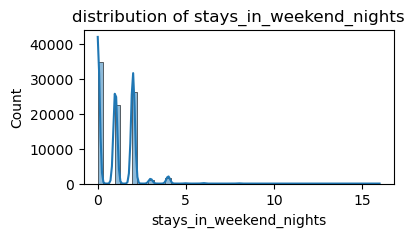

In [28]:
plt.figure(figsize=(4,2))
sns.histplot(df["stays_in_weekend_nights"],bins=50,kde = True)
plt.title("distribution of stays_in_weekend_nights")
plt.show()

 * As i am doing exploratory data analysis outliers will help me to find the pattern and insight.
 * we will not remove the and it is not abouve 5 night so we can keep it.

 There is very low linear relationship between the columns.

### `Visualization of dataset`

### `Check class imbalance`

C:\Users\rajvi\AppData\Local\Temp\ipykernel_14516\222197889.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(df["is_canceled"].value_counts(),palette=["#1f77b4", "#ff7f0e"])


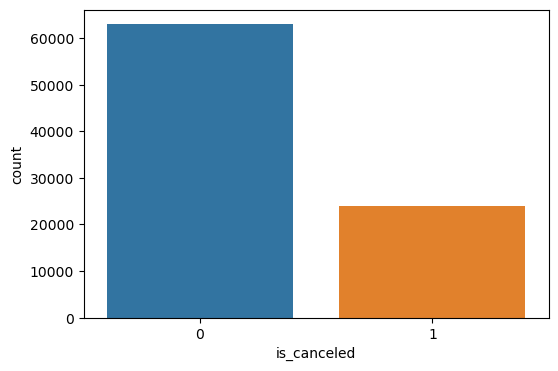

In [33]:
plt.figure(figsize=(6,4))
sns.barplot(df["is_canceled"].value_counts(),palette=["#1f77b4", "#ff7f0e"])
plt.show()

* This barplot shows that data is little imbalance and not canceled is more then is canceled.

* For the model building we need to do logarithm or we can use other things like using ensemble techniques, smote.

In [35]:
df.columns

Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies', 'meal',
       'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type', 'agent',
       'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status', 'reservation_status_date'],
      dtype='object')

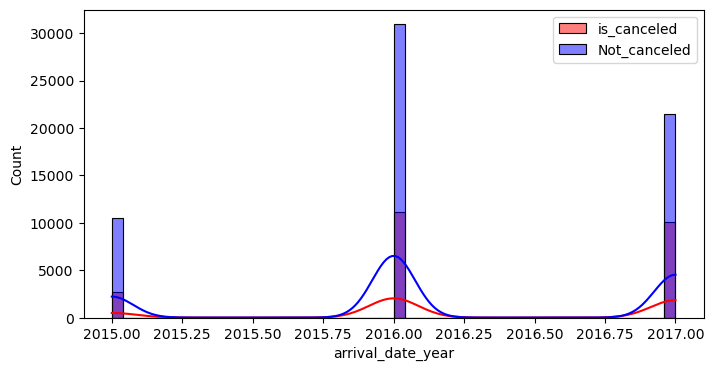

In [36]:
plt.figure(figsize=(8,4))
sns.histplot(df[df["is_canceled"]==1]["arrival_date_year"],bins=50,kde=True,color="red",label="is_canceled")
sns.histplot(df[df["is_canceled"]==0]["arrival_date_year"],bins=50,kde=True,color="blue",label="Not_canceled")
plt.legend()
plt.show()

### `Check the data distribution.`

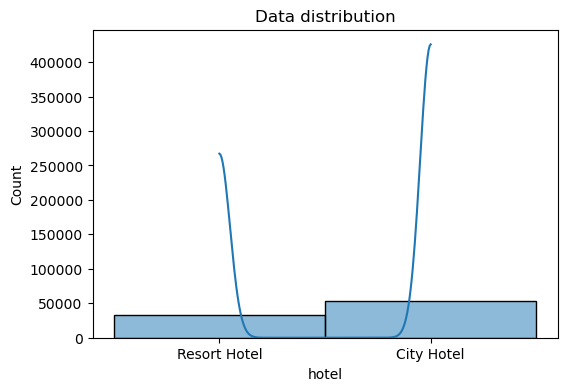

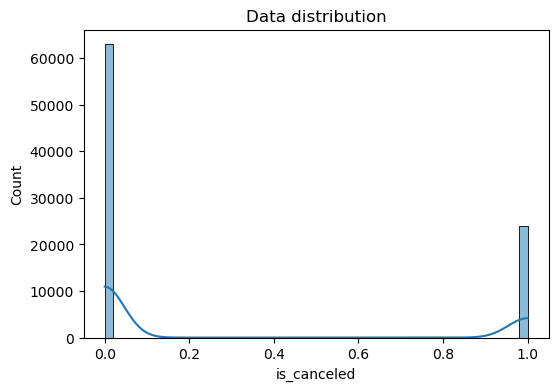

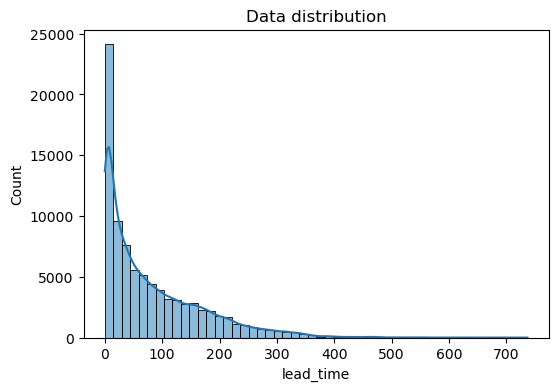

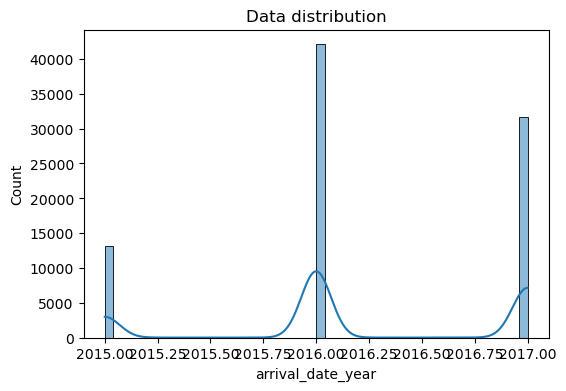

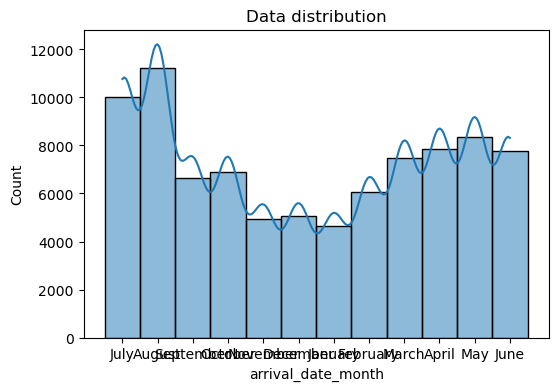

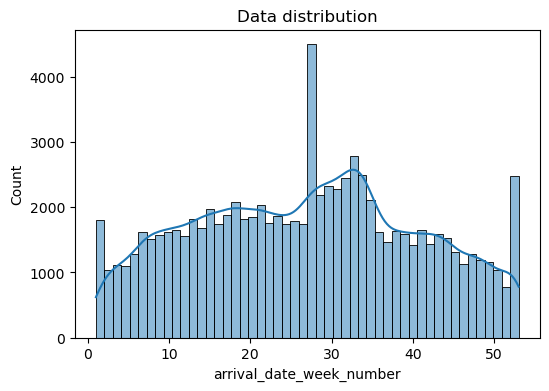

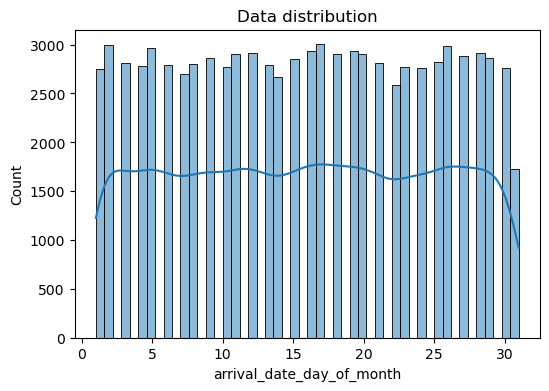

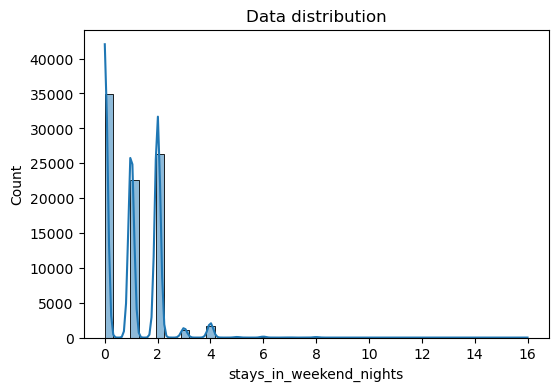

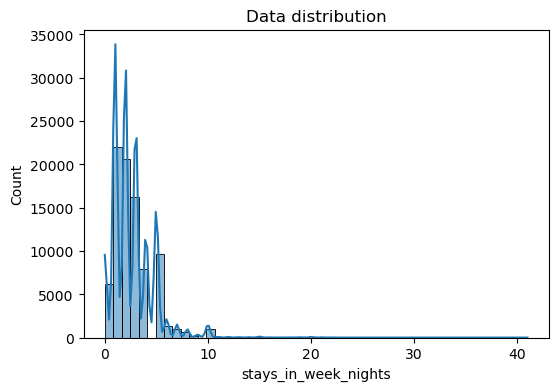

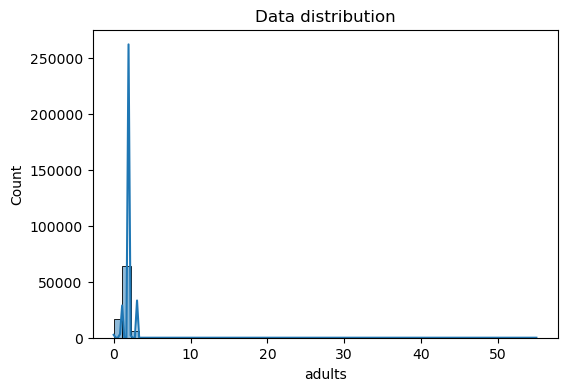

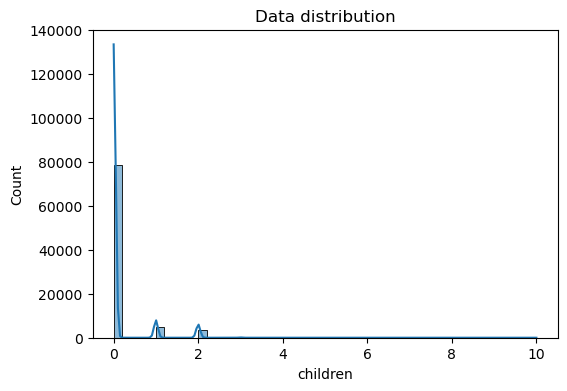

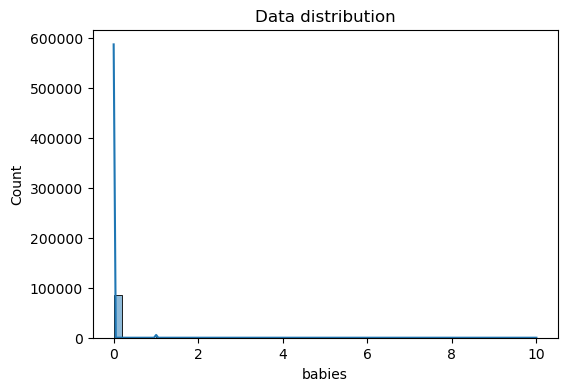

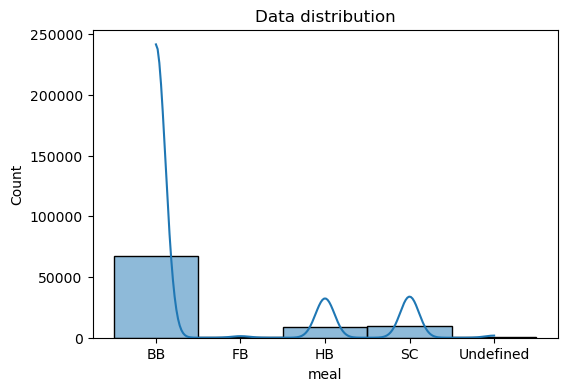

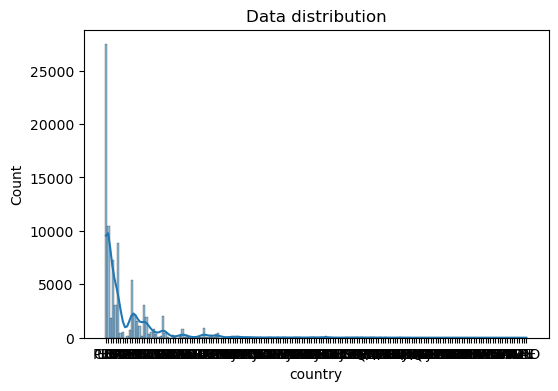

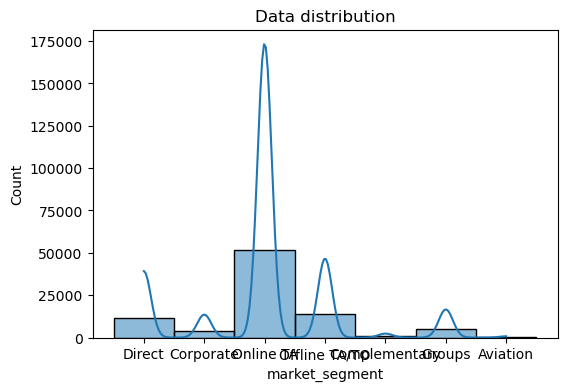

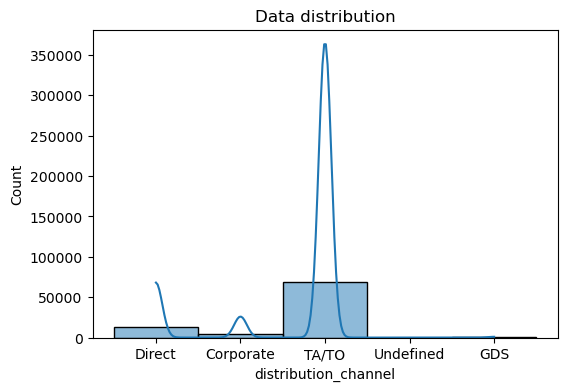

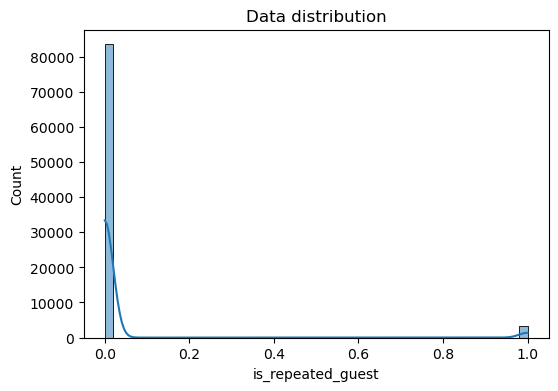

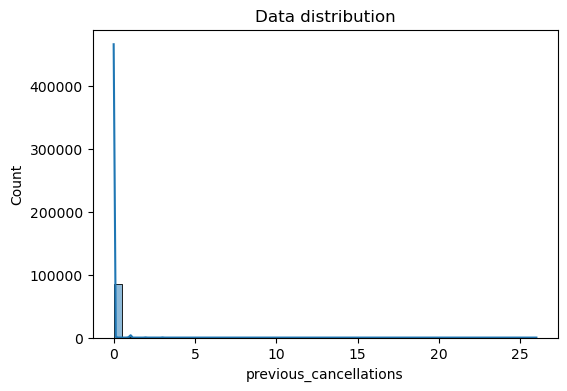

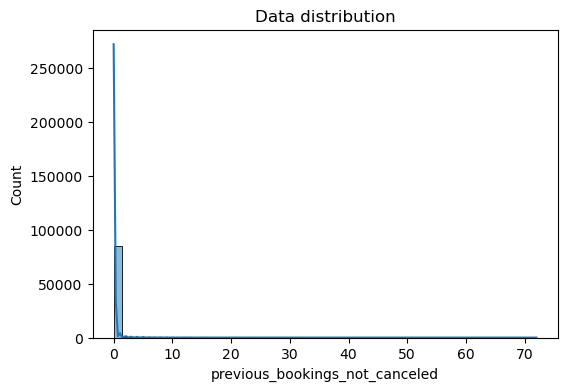

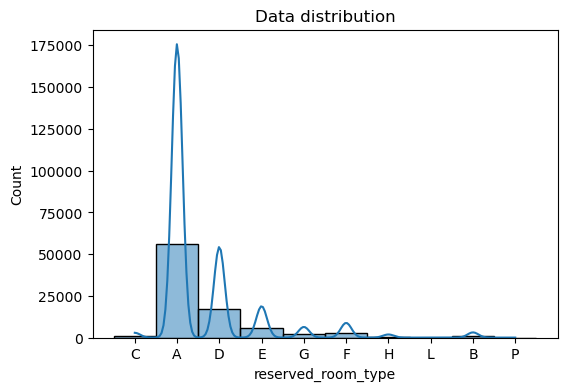

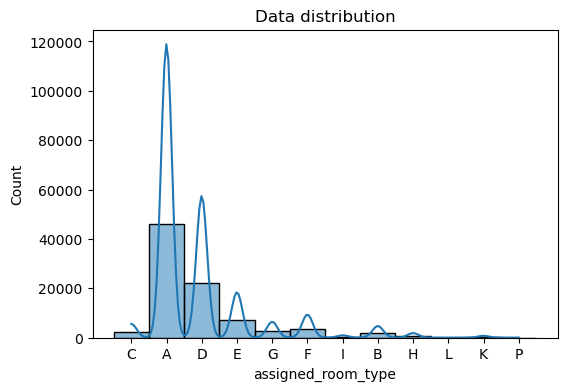

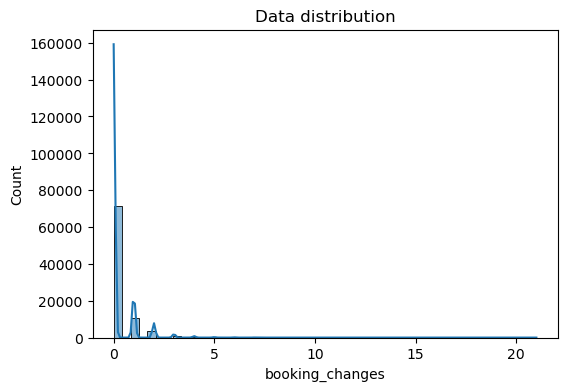

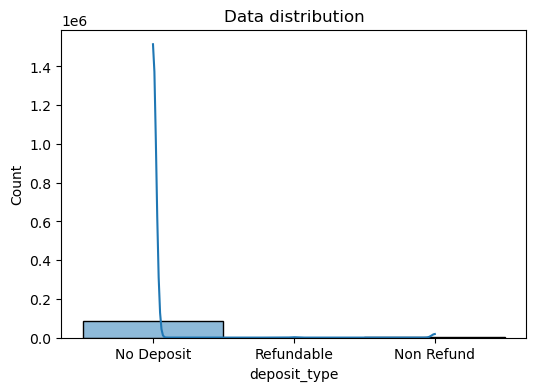

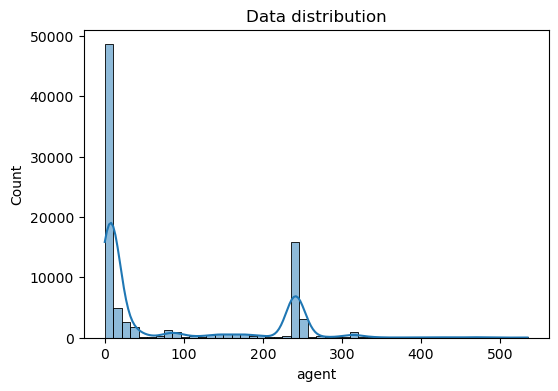

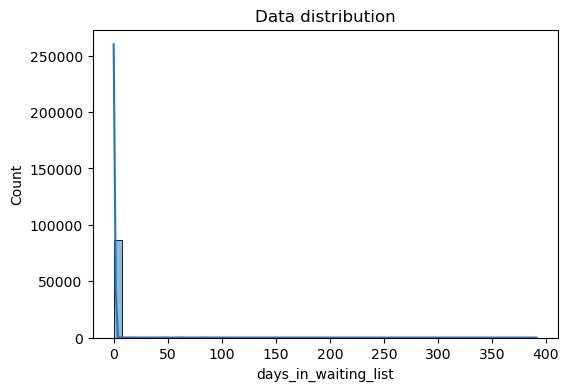

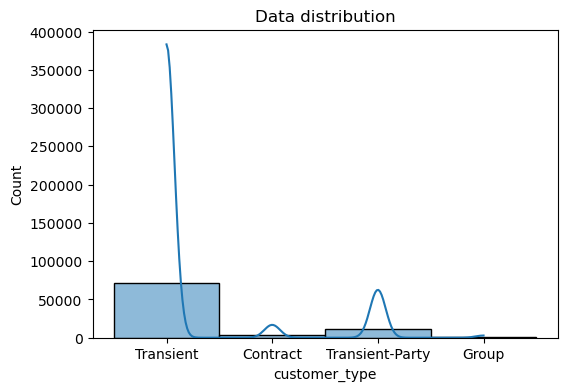

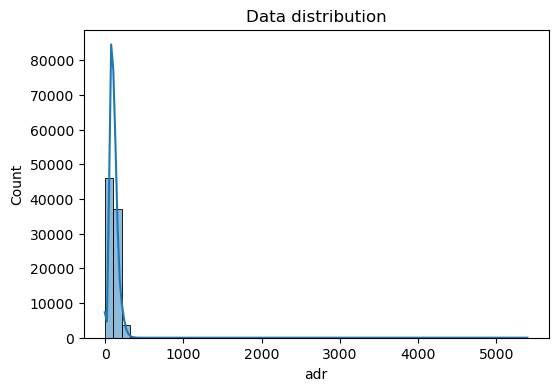

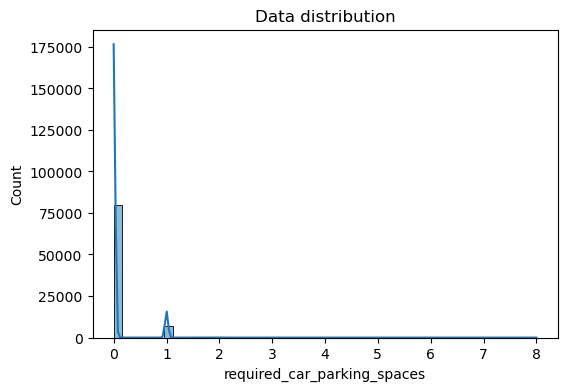

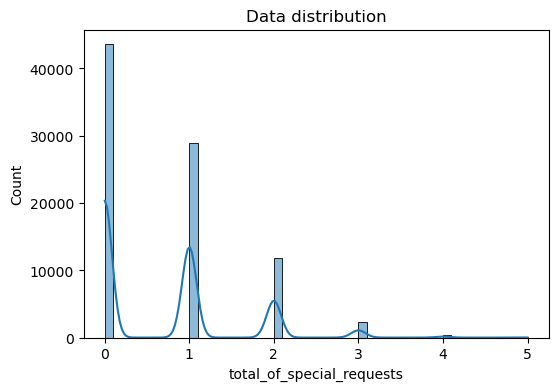

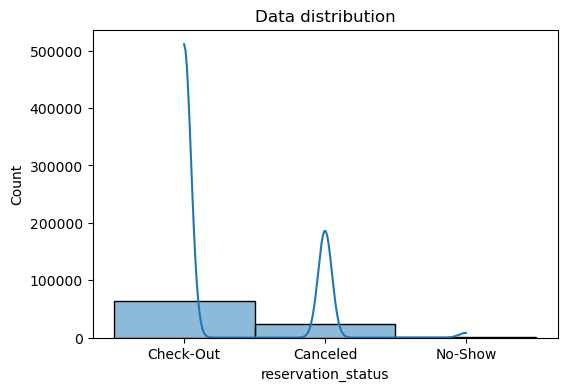

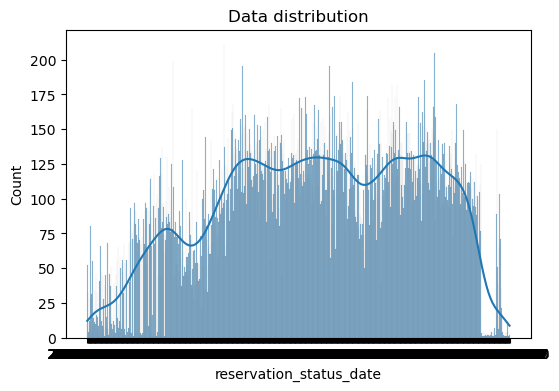

In [38]:
for var in df.columns:
    plt.figure(figsize=(6,4))
    sns.histplot(df[var],bins=50,kde=True)
    plt.title("Data distribution")
    plt.show()

* The columns in the dataset is not normally distributed.

* There are so much skewness in the dataset.

### `Check Market Distribution`

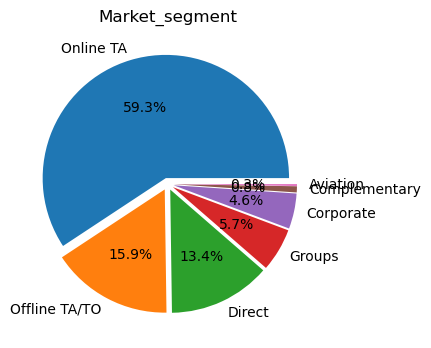

In [41]:
market_segment = df["market_segment"].value_counts()

plt.figure(figsize=(6,4))
plt.pie(market_segment,labels=market_segment.index,explode=[0.05,0.05,0.05,0.05,0.05,0.05,0.05],autopct="%1.1f%%")
plt.title("Market_segment")
plt.show()


* Online TA is having the most number of the hotel bookings.

* After that offine TA/TO is having second most number of booking.

* Less booking are from the Aviation and corporate.

* We should focus more on the Online TA and Offline TA/TO.

C:\Users\rajvi\AppData\Local\Temp\ipykernel_14516\2220126410.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(new_df["hotel"].value_counts(),palette=["#1f77b4", "#ff7f0e"])


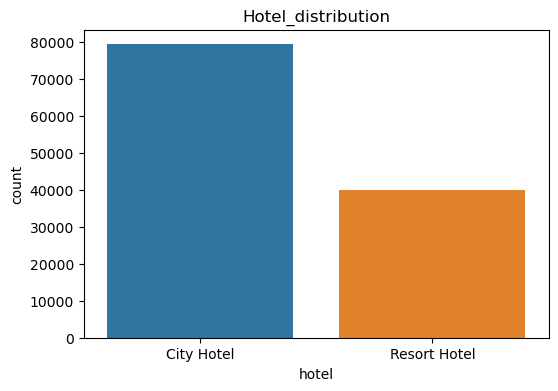

In [43]:
plt.figure(figsize=(6,4))
sns.barplot(new_df["hotel"].value_counts(),palette=["#1f77b4", "#ff7f0e"])
plt.title("Hotel_distribution")
plt.show()

#### `Checking the hotel distribution.`

C:\Users\rajvi\AppData\Local\Temp\ipykernel_14516\843274850.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(new_df["hotel"].value_counts(),palette=["#1f77b4", "#ff7f0e"])


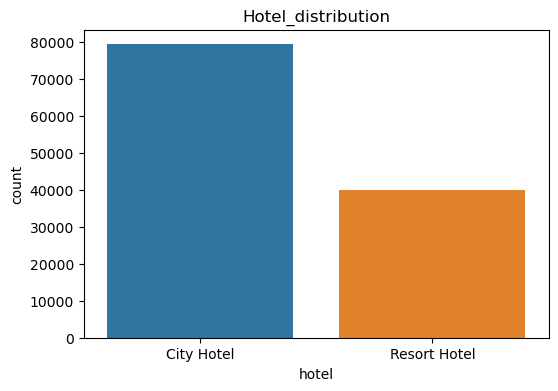

In [45]:
meal_counts=df["meal"].value_counts()

plt.figure(figsize=(6,4))
sns.barplot(new_df["hotel"].value_counts(),palette=["#1f77b4", "#ff7f0e"])
plt.title("Hotel_distribution")
plt.show()

* People are more preffering city hotel over resort hotel.

* From what I understand, city hotels are mainly booked for business or office-related purposes.

* People are mostly using the resort hotels for the holiday that's the only reason the resote booking is less then city hotels.

* Resorts needs to come up with a plan so that they can increase the hotel booking.

 #### `Most prefered meal by the customers`

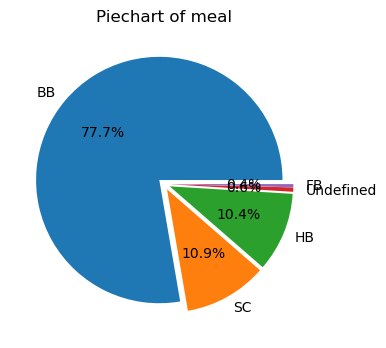

In [48]:
# We are checking the distribution of meal which one is most prefered by the customers.
meal_counts=df["meal"].value_counts()
plt.figure(figsize=(6,4))
plt.pie(meal_counts,labels=meal_counts.index,explode=[0.05,0.05,0.05,0.05,0.05],autopct="%1.1f%%")
plt.title("Piechart of meal")
plt.show()

* Bed and Breakfast have most prefferable meal for the customer.

* Customer are preffering the BB more the any other meals.

* half board is second prefferable.

* We should focus more on the Bed and Breakfast to customer retention and attract more customer.

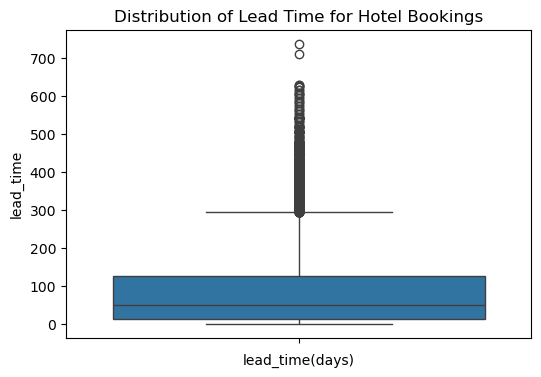

In [50]:
# Distribution of Lead Time for Hotel Bookings
plt.figure(figsize=(6,4))
sns.boxplot(df["lead_time"])
plt.xlabel("lead_time(days)")
plt.title("Distribution of Lead Time for Hotel Bookings")
plt.show()

* In this we can see most of the booking happended in the last minute.

* Only some the customer have done the early bookings.

### `Hotel type with highest adr.`

C:\Users\rajvi\AppData\Local\Temp\ipykernel_14516\1756874384.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x = highest_agr["hotel"],y =highest_agr["adr"],palette=["#1f77b4", "#ff7f0e"])
C:\Users\rajvi\AppData\Local\Temp\ipykernel_14516\1756874384.py:6: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(["City hotel","Resort hotel"],fontsize=10)


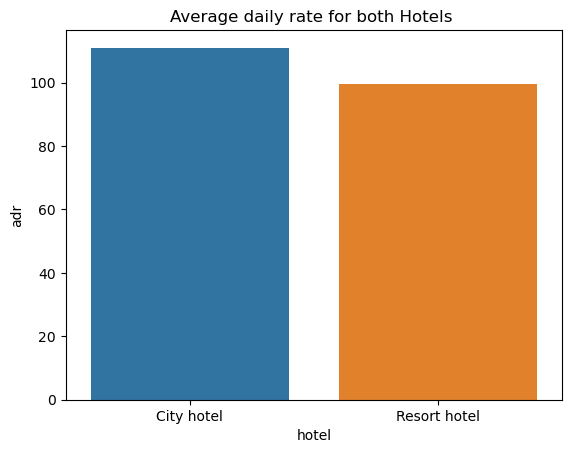

In [53]:
# we need to do the groupby of hotel.

hotel_groupby = df.groupby("hotel")
highest_agr = hotel_groupby["adr"].mean().reset_index()
ax = sns.barplot(x = highest_agr["hotel"],y =highest_agr["adr"],palette=["#1f77b4", "#ff7f0e"])
ax.set_xticklabels(["City hotel","Resort hotel"],fontsize=10)
ax.set_title("Average daily rate for both Hotels ")
plt.show(ax)

* City hotels have more average daily rate then resort hotel.

* As we observed earlier, bookings are higher for city hotels, so resorts lag slightly behind in average daily sales so its good.

* Resort hotels need to step up their game to attract new customers and improve their ADR.

### `Repeated Guest Percentage`

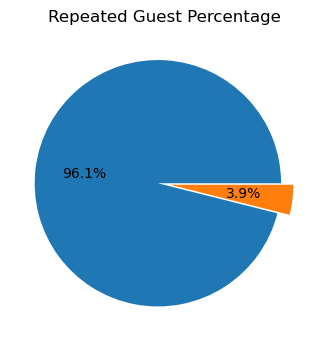

In [56]:
Repeated_guest = df["is_repeated_guest"].value_counts()
plt.figure(figsize=(6,4))
plt.pie(Repeated_guest,explode=[0.05, 0.05],autopct="%1.1f%%")
plt.title("Repeated Guest Percentage")
plt.show()

* Customer retention is 3.2% which is very bad for the company. They need to think deeply on this matter.

* Customers who do not return make up 96.8%. They need to plan something which can increase the Customer retention.

  

### `Deposit_type by customer`

C:\Users\rajvi\AppData\Local\Temp\ipykernel_14516\4241612793.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(df["deposit_type"].value_counts(),palette=["#1f77b4", "#ff7f0e"])
C:\Users\rajvi\AppData\Local\Temp\ipykernel_14516\4241612793.py:2: UserWarning: 
The palette list has fewer values (2) than needed (3) and will cycle, which may produce an uninterpretable plot.
  sns.barplot(df["deposit_type"].value_counts(),palette=["#1f77b4", "#ff7f0e"])


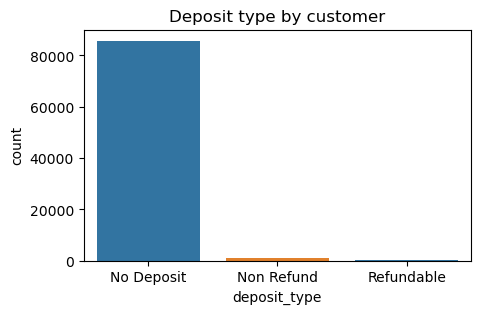

In [59]:
plt.figure(figsize=(5,3))
sns.barplot(df["deposit_type"].value_counts(),palette=["#1f77b4", "#ff7f0e"])
plt.title("Deposit type by customer")
plt.show()

* Most of the people did not prefer to deposit any kind of money.

* In the graph we can see that there is no refundable amount.

* Only little amount of people did the deposit and that's not refundable deposit.

* From the graph, we can analyze that people are not receiving refundable amounts from the hotel. Providing refunds would make guests feel safer if they decide not to travel, they can cancel without losing money. This would also serve as great marketing for the hotel

### `Checking the ADR in each year.`

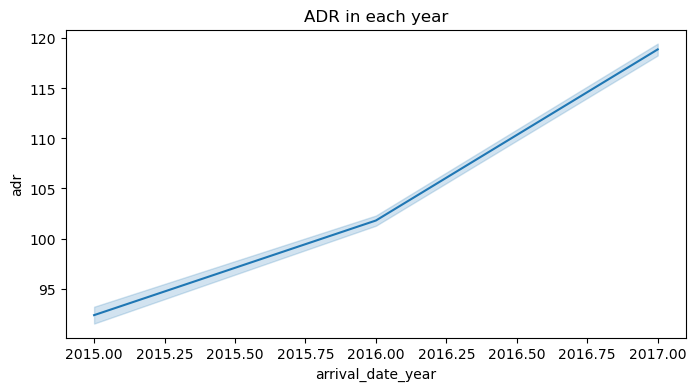

In [62]:
plt.figure(figsize=(8,4))
sns.lineplot(x=df["arrival_date_year"],y=df["adr"])
plt.title("ADR in each year")
plt.show()

* Yearly-wise, they are doing well, maintaining a good pace, and the trend is positive

* The trend started to shift positively after 2016.

### `Checking ADR in each month`

In [65]:
groupby_arrival = df.groupby("arrival_date_month")["hotel"].count().reset_index()

months = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']

groupby_arrival["arrival_date_month"] = pd.Categorical(groupby_arrival["arrival_date_month"],categories=months,ordered=True)

groupby_arrival = groupby_arrival.sort_values("arrival_date_month")

groupby_arrival

,arrival_date_month,hotel
4,January,4638
3,February,6043
7,March,7459
0,April,7871
8,May,8343
6,June,7753
5,July,10024
1,August,11232
11,September,6659
10,October,6883


### `Checking ADR with the help of barplot.`

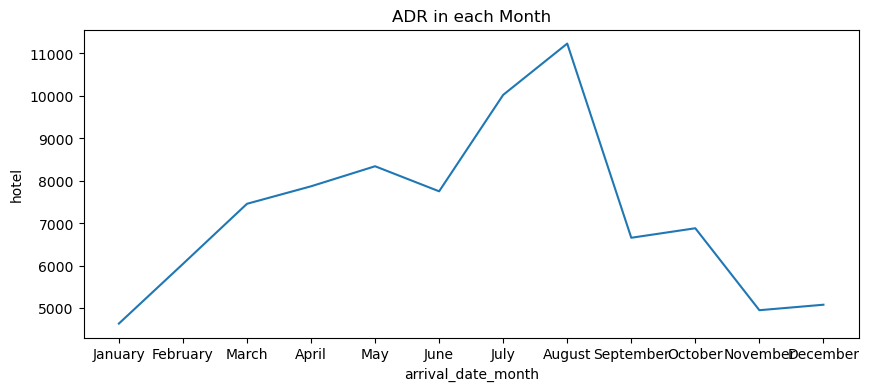

In [67]:
plt.figure(figsize=(10,4))
sns.lineplot(x=groupby_arrival["arrival_date_month"],y=groupby_arrival["hotel"])
plt.title("ADR in each Month")
plt.show()

* Customers prefer to go on trips in August because the graph shows that it is the peak month.

* This graph shows that trend is not stationary. And the peak season is August.

* Therefore, they should prepare in advance of August to maximize their bookings.

* They need to take strategic steps, as the trend shows a sharp decline after August, with ADR falling to around 80. Proactive measures are essential to remain competitive in the market.

### `Checking the required_car_parking_spaces with pie chart.`

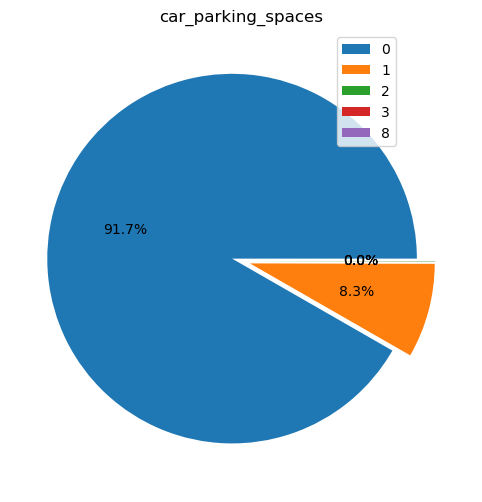

In [70]:
plt.figure(figsize=(8,6))
plt.pie(df["required_car_parking_spaces"].value_counts(),autopct="%1.1f%%",explode=[0.05]*5)
labels=df["required_car_parking_spaces"].value_counts().index
plt.title("car_parking_spaces")
plt.legend(bbox_to_anchor = (0.85, 1),loc="upper right",labels=labels)
plt.show()

* Most people do not require a car parking space nearly 91.7% of bookings are made without requesting any parking facility.

* However, there is still a segment of customers around 8.3% who do look for car parking. While it may seem small, it represents nearly 10% of the business. Therefore, it's important to address this need to retain and attract these customers.

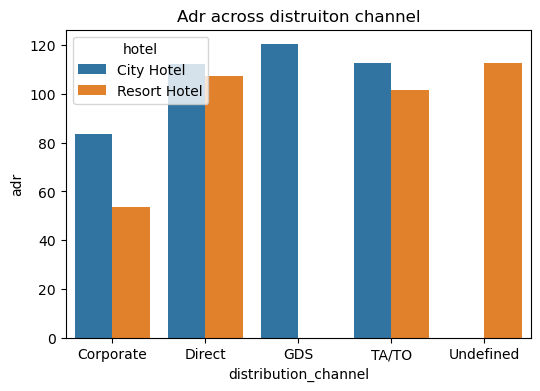

In [72]:
distrubution_df = df.groupby(["distribution_channel","hotel"])["adr"].mean().reset_index()
plt.figure(figsize=(6,4))
sns.barplot(x="distribution_channel",y="adr",data=distrubution_df,hue="hotel")
plt.title("Adr across distruiton channel")
plt.show()


* City hotels have an advantage over resort hotels, as they account for a larger share of the bookings.

* GDS is not having any competition with the resort.


### `Analyze the hotel booking and cancellation data.`

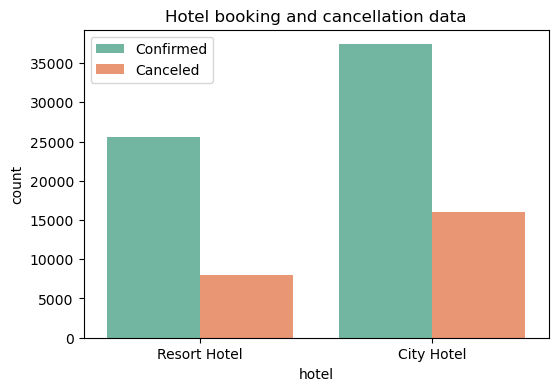

In [75]:
plt.figure(figsize=(6,4))
sns.countplot(x="hotel",data=df,hue="is_canceled", palette = "Set2")
plt.legend(["Confirmed","Canceled"])
plt.title("Hotel booking and cancellation data")

plt.show()

* City hotels have over 35,000 bookings, but half of them have been canceled.
  
* Resort hotels have around 25,000 bookings, and the number of cancellations is slightly less than half of that.

* Both types of hotels need to reduce their cancellation rates, as doing so would be beneficial for their business.

* Currently, nearly half of the bookings are being canceled, so it's important for them to come up with a strategic plan to address this issue.

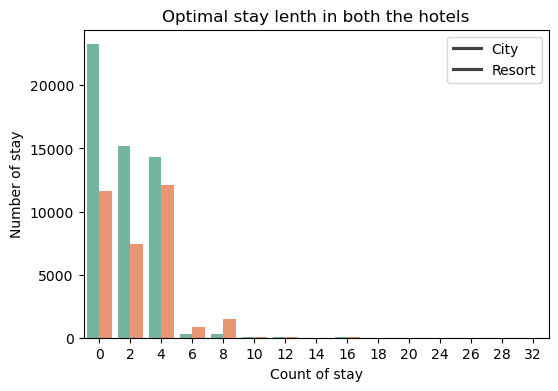

In [77]:
# Visualizing with the help of bar plot

# Adding both the columns stays_in_weekend_nights and stays_in_weekend_nights to get the total_stay.
df["total_stay"] =df["stays_in_weekend_nights"] + df["stays_in_weekend_nights"]

# using groupby funtion on total stay and hotel.
stay = df.groupby(["total_stay","hotel"]).agg("count").reset_index()

# Removing the first 3 columns.
stay.iloc[:,:3]

stay = stay.rename(columns={"is_canceled":"Number of stays"})

plt.figure(figsize=(6,4))
sns.barplot(data=stay,x="total_stay",y="Number of stays",hue="hotel",palette = "Set2")
plt.legend(["City","Resort"])
plt.title("Optimal stay lenth in both the hotels")
plt.xlabel("Count of stay")
plt.ylabel("Number of stay")
plt.show()

* Customer prefer to stay for only 3 days after that, the graph drops drastically for both the hotels.

* City hotels booking is higher than the resort.

* In several locations, resort bookings are steadily increasing, with more guests opting to stay for longer durations.

### `Year wise booking`

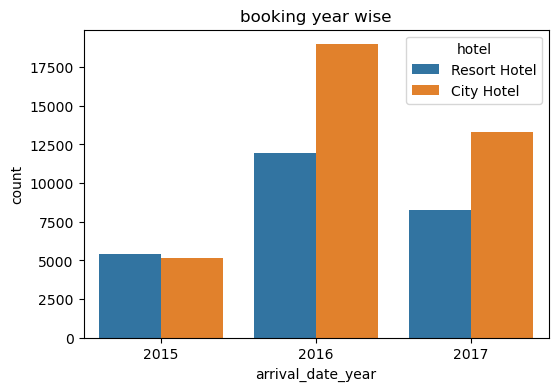

In [80]:
data_not_canceled = df[df["is_canceled"]==0]

plt.figure(figsize=(6,4))
sns.countplot(x="arrival_date_year", hue="hotel", data=data_not_canceled)
plt.title("booking year wise")
plt.show()

* The year 2016 recorded the highest number of bookings, with the Resort Hotel emerging as the most preferred choice among guests.

* The year 2017 recorded the second highest number of bookings with the resort merging as the most preferred choice among the guests

* From this, we can infer that the City Hotel needs to improve its marketing strategy to attract more new guests.

### `ADR across different months`

In [83]:
# using groupby function
Adr_diff = df.groupby(["arrival_date_month","hotel"])["adr"].mean().reset_index()

# Create month list
months = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']

Adr_diff["arrival_date_month"] = pd.Categorical(Adr_diff["arrival_date_month"],categories=months,ordered =True)

Adr_diff

,arrival_date_month,hotel,adr
0,April,City Hotel,117.179317
1,April,Resort Hotel,79.636959
2,August,City Hotel,124.959458
3,August,Resort Hotel,187.699727
4,December,City Hotel,92.748112
5,December,Resort Hotel,65.556477
6,February,City Hotel,88.945304
7,February,Resort Hotel,54.402637
8,January,City Hotel,85.092612
9,January,Resort Hotel,49.358805


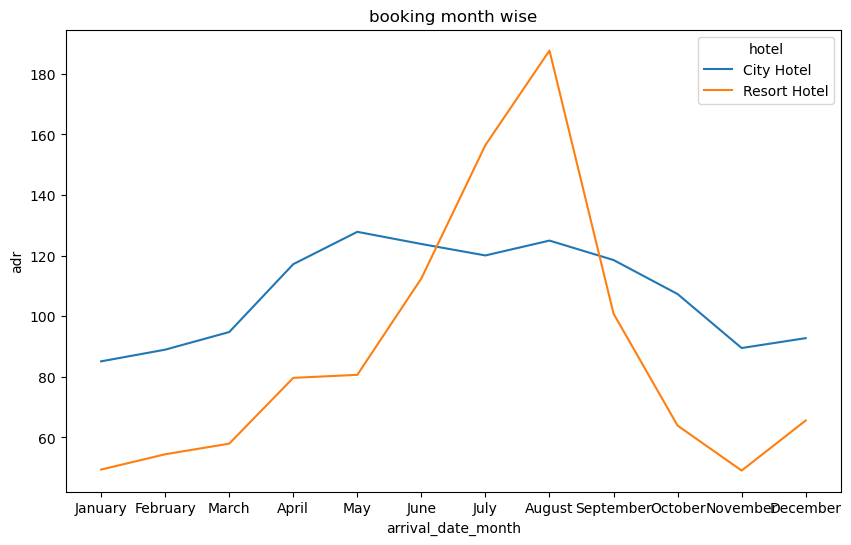

In [84]:
plt.figure(figsize=(10,6))
sns.lineplot(x="arrival_date_month", y="adr",hue="hotel",data=Adr_diff)
plt.title("booking month wise")
plt.show()

* City Hotels are following a similar pattern, with ups and downs, but the overall pace remains steady.

* Resort Hotels do not show a constant trend; their bookings rise significantly during August.

* After August, there is a noticeable decline in bookings.

* City Hotels are on an upward trend but remain relatively constant; they need to take strategic actions to accelerate growth beyond the current pace.

* Resort Hotels experience a sharp increase in bookings during one particular month, followed by a steep decline, indicating a need for better off-season engagement.

### `Most preffered room type.`


C:\Users\rajvi\AppData\Local\Temp\ipykernel_14516\546703950.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df["assigned_room_type"],order=df["assigned_room_type"].value_counts().index,palette="Paired")


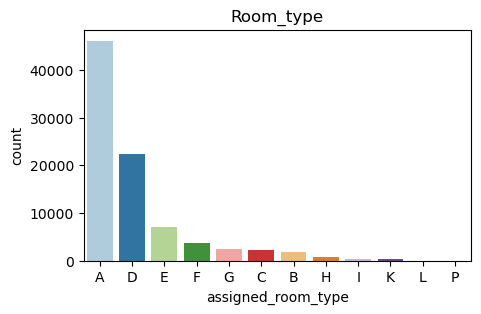

In [87]:
plt.figure(figsize=(5,3))
sns.countplot(x=df["assigned_room_type"],order=df["assigned_room_type"].value_counts().index,palette="Paired")
plt.title("Room_type")
plt.show()

* Room Type A has the highest number of bookings, with over 40,000 rooms booked.

* Room Type D has the second-highest number of bookings, with around 20,000 rooms booked

* After Room Type E, there are some room types that have very few bookings.

* To improve this, the hotel should consider enhancing the room quality, interface, and interior design to make them more appealing to customers.

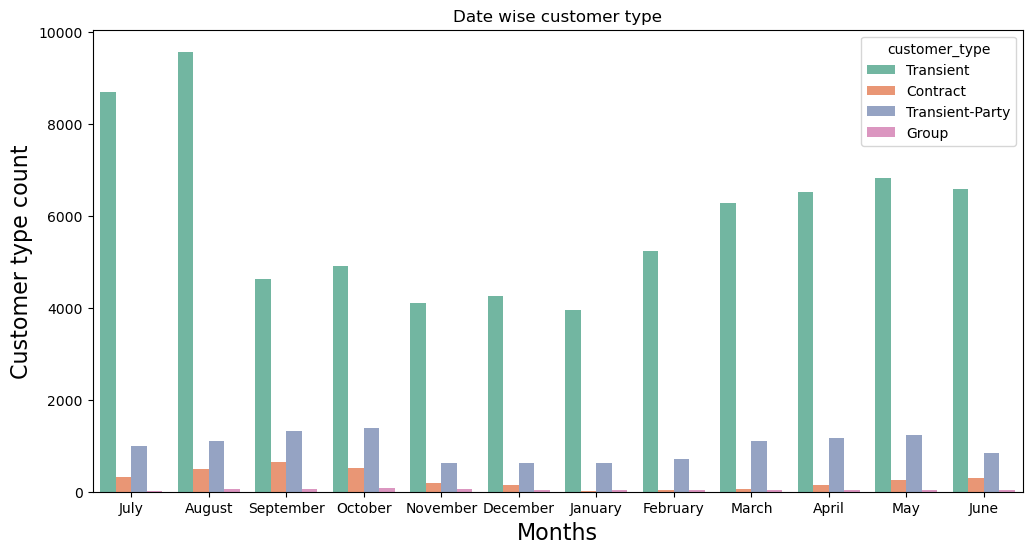

In [89]:
# Using seeborn to plot a count plot chart to demonstrate the types of customer visit the most

# Set the plot size
plt.figure(figsize=(12,6))
sns.countplot(x="arrival_date_month",hue="customer_type", palette = 'Set2', data=df)
plt.title("Date wise customer type")
plt.ylabel('Customer type count', fontsize = 16)
plt.xlabel('Months', fontsize = 16)
plt.show()

* Transient has the highest number of bookings in each month.
  
* Transient Party holds the second-highest number of bookings.
  
* Hotels should address this and implement strategies to attract a wider variety of guest types.

* Hotels should focus on delivering excellent service to their highest-booking guests to enhance their experience and ensure guest retention.

### `Check the Correlation between variables.`

In [92]:
Obj_col=[]
for i in df.columns:
    if df[i].dtype != "object":
        Obj_col.append(i)
    

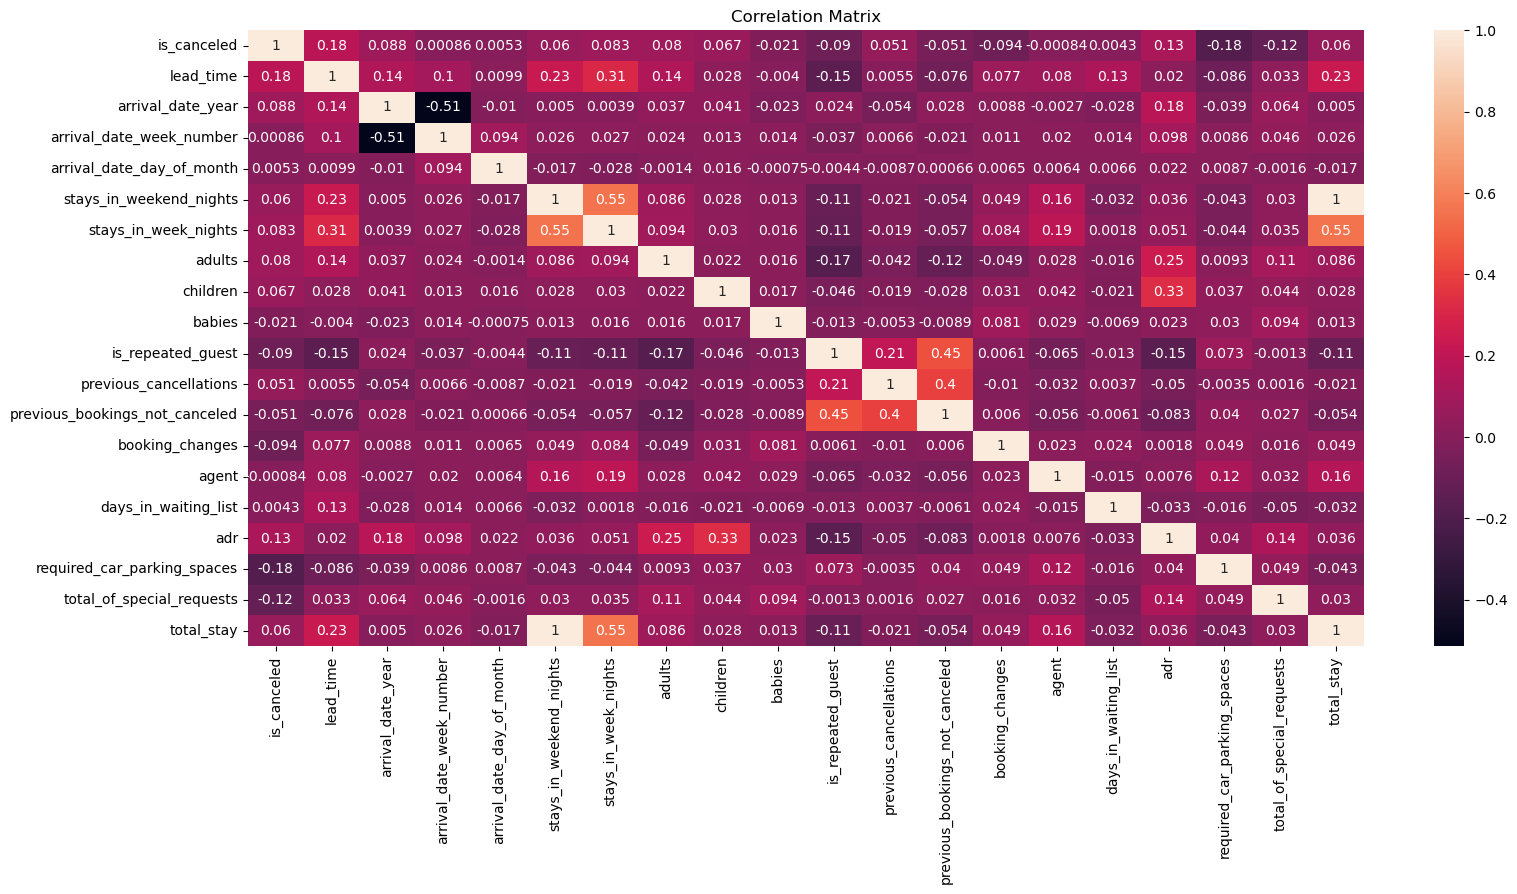

In [93]:
corr_matrix=df[Obj_col]

plt.figure(figsize=(18,8))
sns.heatmap(corr_matrix.corr(),annot=True)
plt.title("Correlation Matrix")
plt.show()

* The linear relationship between the variables is very weak.

* This suggests that the variables are not strongly correlated.

* A change in one variable does not significantly influence the other.

* This implies that the variables may be independent or require non-linear analysis for better understanding.



### `Conclusion`

* City Hotels are the most preferred type by guests, making them the busiest compared to Resort Hotels.

* The average ADR of city hotels is higher as compared to the resort hotels. So, it can be said that these City hotels are generating more revenue than the resort hotels.

* The total stay of guests is directly proportional to the adr. So, higher the days of stay, the higher will be ADR and revenue as well.

* he percentage of repeated guests is very low. Only 3.9% people had revisited the hotels. Rest 96.1% were new guests. So, retention rate is much low.

* The percentage of required car parking spaces is very low. This means less car parking spaces don't affect the business much. Most of the customers (91.6%) do not require car parking spaces.

* Among different types of meals, BB (Bed & Breakfast) is the most preferred type of meal by the guests. So, guests love to opt for this meal type.

  'Direct' and 'TA/TO' have almost equally contribution in ADR in both type of hotels i.e. 'City Hotel' and 'Resort Hotel'. While, GDS has highly contributed in ADR in 'City Hotel' type.

* Optimal stay length in both the hotel types (City and Resort Hotel) is less than 7 days. Usually people stay for a week. So, after 1 week, the optimal stay length declined drastically.

*  Most number of bookings have taken place in the month of July and August. July and August are the favourite months of guests to visit different places.

*  The mostly used distribution channel for booking is 'TA/TO'. 79.1% bookings were made through TA/TO (travel agents/ tour operators).

*  While calculating ADR across different month, it is found that for Resort hotel, ADR is high in the months of June, July, August as compared to City Hotels.

*   Almost 1/4th of the total bookings is canceled. Approx, 27.5% bookings have got canceled out of all the bookings.

*   Majority of the guests have shown interest in the room type 'A'. Room type 'A' is the most preferred room type.